In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
np.random.seed(1337)

In [2]:
0.86**2

0.7395999999999999

In [16]:
df = pd.read_pickle('../dataset/spam.p')
df = df[['log_char','text','has_bbm_pin','has_pattern_produk','has_pattern_yu+k','label']]
df.head()

,log_char,text,has_bbm_pin,has_pattern_produk,has_pattern_yu+k,label
0,3.401197,👆Apa apaan ni orang ngehujat:v,False,False,False,0
1,5.273000,Makasih makasih makasih@dr.asharisukma.herbal ...,False,False,False,1
2,5.153292,TEMUKAN RAHASIA TUBUH IDEAL & KULIT MULUS PARA...,True,False,False,1
3,3.433987,ANJIRRR UDAH S2 -___- baru ngeh,False,False,False,0
4,4.248495,Hai cantik.. Mampir yuuk 😘 ga digembok loh 🔓🔓🔓...,False,False,True,1


In [17]:
df[(df['has_bbm_pin'] == True) & (df['label'] == 0)]

,log_char,text,has_bbm_pin,has_pattern_produk,has_pattern_yu+k,label
97,5.468060,SEDIH MELIHAT MEREKA YANG TERTIPU DENGAN MINYA...,True,False,False,0
213,6.232448,🈵 🇵🇪🇲🇧🇪🇸🇦🇷 🇵🇦🇾🇺🇩🇦🇷 🇦 🈶 INGIN MEMBESARKAN & ME...,True,False,False,0
1209,7.049255,📦📦 Tambah Tinggi (3-10cm) usia 13 s/d 35 thn. ...,True,True,False,0
1587,5.476464,Pingin payudara INDAH dan kencang itu di-Rawat...,True,True,True,0
3422,5.332719,Punya masalah dgn berat badan 😒 ? Jerawat susa...,True,False,False,0
3438,5.283204,"INVITE 5E8CA768 "" GAK PEDE SAMA UKURAN PAYUDAR...",True,False,False,0
3593,6.054439,Apa itu M.H.C.A?? nah utk para wanita remaja a...,True,False,False,0
3838,5.003946,Yuhuuu😍 di akun@DR.YUSUF_HERBAL.KESEHATAN kam...,True,False,False,0
3939,3.465736,Serasi win 😍 @windyanjar13072210,True,False,False,0
5105,5.278115,"#aadc2 jelek bgt filmnye, garing, datarrr, mem...",True,False,False,0


In [18]:
df[df['has_bbm_pin'] == True]

,log_char,text,has_bbm_pin,has_pattern_produk,has_pattern_yu+k,label
2,5.153292,TEMUKAN RAHASIA TUBUH IDEAL & KULIT MULUS PARA...,True,False,False,1
5,3.178054,👈 HOT PROMO hub 7d48707e,True,False,False,1
32,5.501258,FOLLOWIG@CANTIK_SIMPLE HANYA BUAT KAMU YG INGI...,True,False,False,1
40,5.176150,INGIN TAU TIPS TINGGI & LANGSING SECARA GRATIS...,True,False,False,1
89,5.036953,TURUN HARGA💊PENINGGI~(naik3-15CM)--💊PELANGSING...,True,False,False,1
97,5.468060,SEDIH MELIHAT MEREKA YANG TERTIPU DENGAN MINYA...,True,False,False,0
104,4.905275,SOLUSI AMPUH MEMBERSARKAN DAN MENGENCANGKAN PA...,True,False,False,1
110,7.042286,📦📦 Tambah Tinggi (3-10cm) usia 13 s/d 35 thn. ...,True,True,False,1
125,5.888878,KONSULTASIKAN masalah BERAT BADAN anda INGIN N...,True,False,False,1
150,5.105945,BAGI ANDA YANG MERASA KEPUTIHAN SERING MENGGAN...,True,False,False,1


In [4]:
spam = df[df.label == 1].sample(5)
ham = df[df.label == 0].sample(5)
df = pd.concat([spam, ham], axis=0)

In [5]:
print df.to_latex()

\begin{tabular}{lrlllr}
\toprule
{} &  log\_char & has\_bbm\_pin & has\_pattern\_produk & has\_pattern\_yu+k &  label \\
\midrule
10097 &  5.572154 &       False &               True &             True &      1 \\
9676  &  4.369448 &       False &              False &            False &      1 \\
6502  &  5.529429 &        True &               True &            False &      1 \\
14150 &  5.257495 &        True &              False &            False &      1 \\
6571  &  3.912023 &       False &              False &            False &      1 \\
894   &  3.433987 &       False &              False &            False &      0 \\
13744 &  3.761200 &       False &              False &            False &      0 \\
3043  &  2.772589 &       False &              False &            False &      0 \\
6034  &  4.158883 &       False &              False &            False &      0 \\
303   &  4.234107 &       False &              False &            False &      0 \\
\bottomrule
\end{tabular}



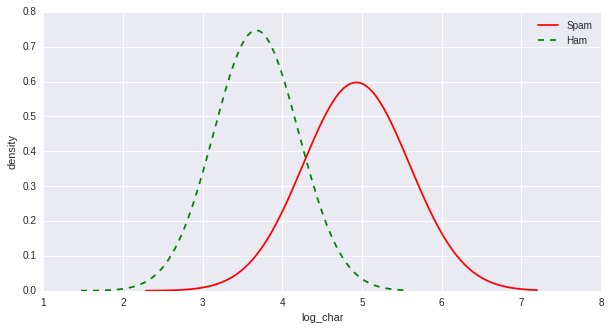

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(spam.log_char, hist=False, fit=norm, fit_kws={'color': 'r', 'linestyle': '-'}, kde=False, label='Spam', ax=ax)
sns.distplot(ham.log_char, hist=False, fit=norm, fit_kws={'color': 'g', 'linestyle': '--'}, kde=False, label='Ham', ax=ax)
plt.ylabel('density')
plt.legend(loc=1)
plt.savefig('log_char.eps', format='eps', dpi=1000)
plt.show()

In [7]:
print spam.log_char.mean()
print spam.log_char.std()
print ham.log_char.mean()
print ham.log_char.std()

4.92810986992
0.746560154864
3.67215312608
0.59719472121


In [8]:
p_true_spam = float(2)/5
p_false_spam = float(3)/5
p_true_ham = float(1)/5
p_false_ham = float(4)/5

In [9]:
new = df.sample(5)
new

,log_char,has_bbm_pin,has_pattern_produk,has_pattern_yu+k,label
3043,2.772589,False,False,False,0
6571,3.912023,False,False,False,1
6034,4.158883,False,False,False,0
10097,5.572154,False,True,True,1
14150,5.257495,True,False,False,1


In [10]:
p_d_spam = p_true_spam * norm.pdf(new.log_char, spam.log_char.mean(), spam.log_char.std()) * 0.5
p_d_ham = p_true_ham * norm.pdf(new.log_char, ham.log_char.mean(), ham.log_char.std()) * 0.5
p_spam = p_d_spam / (p_d_spam+p_d_ham)
p_ham = p_d_ham / (p_d_spam+p_d_ham)
print pd.DataFrame([p_spam, p_ham])

          0         1         2         3         4
0  0.071508  0.407185  0.567394  0.994285  0.980085
1  0.928492  0.592815  0.432606  0.005715  0.019915


In [11]:
norm.pdf()

TypeError: pdf() takes at least 2 arguments (1 given)

In [ ]:
norm.pdf(0, loc=0, scale=5)